Energy Efficiency Dataset.

Objective: Analyze energy efficiency metrics in buildings.

Data Set Information: We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

Attribute Information: The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Source: https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset

Kaggle => https://www.kaggle.com/code/vishwaaradhyamath/energyefficient-eda-regression-ipynb

In [37]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ignore all warnings
warnings.filterwarnings("ignore")
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="This is a specific warning to ignore")


In [38]:
# Step 1: Setup and Data Preparation
# Load the dataset
df = pd.read_csv('/content/sample_data/ENB2012_data.csv')

# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())
print("\nDataset shape:")
print(df.shape)

First 5 Rows of the Dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Dataset shape:
(768, 10)


In [39]:
# Inspect the dataset structure
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


In [40]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.0100

In [41]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [42]:
# Handle missing values if any (e.g., fill with median)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


Feature Distributions:


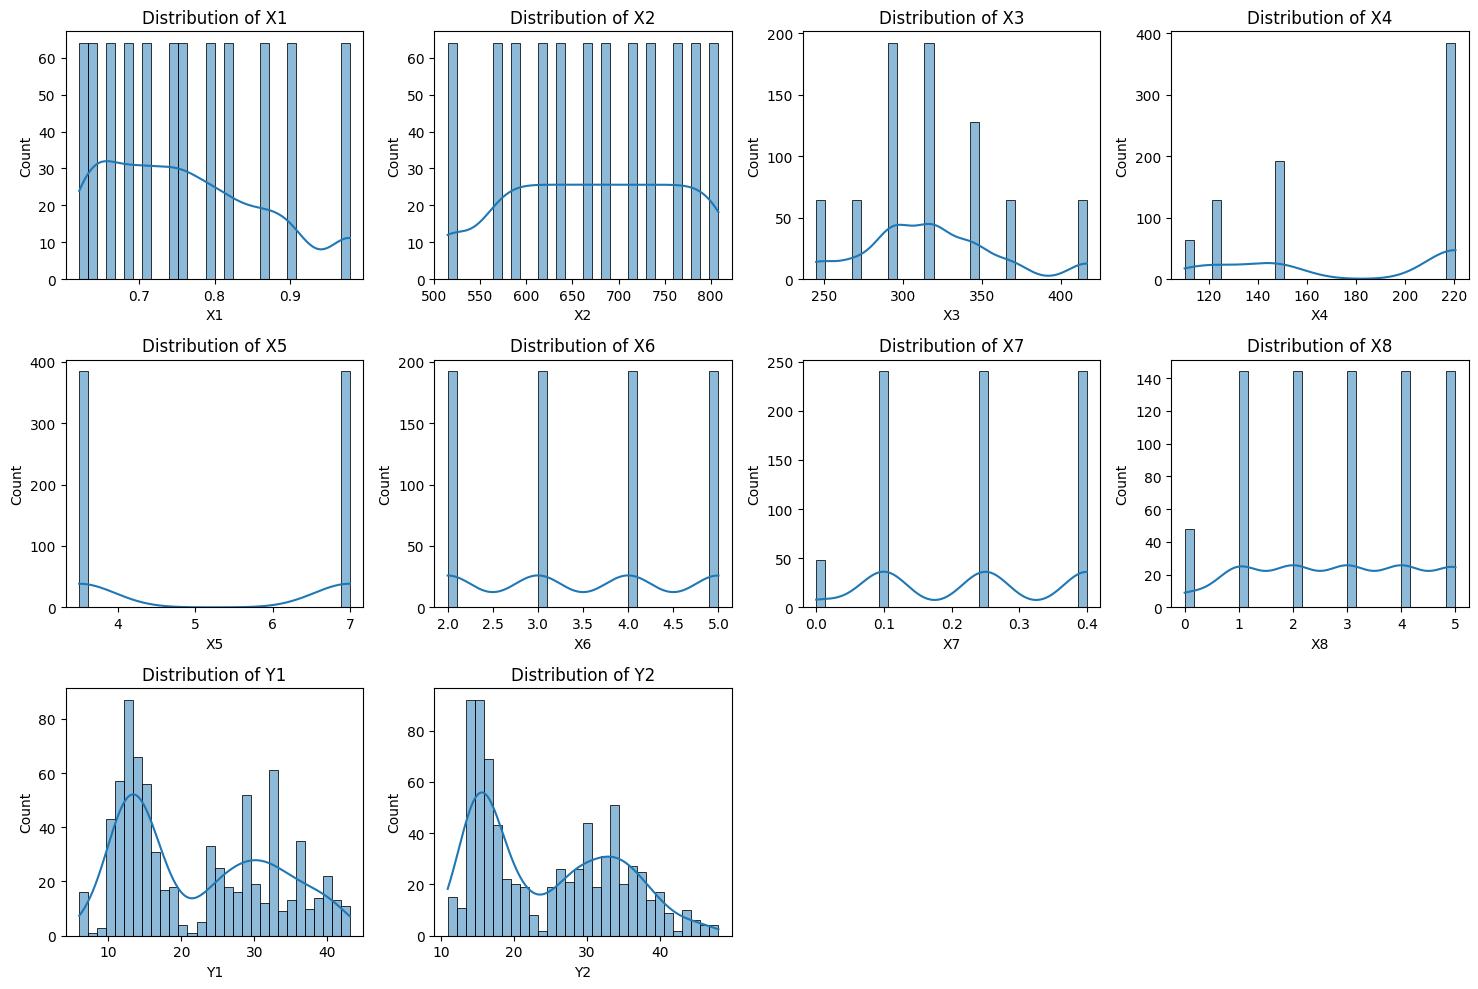

In [43]:
# Step 2: Exploratory Data Analysis (EDA)
# Visualize feature distributions
print("\nFeature Distributions:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

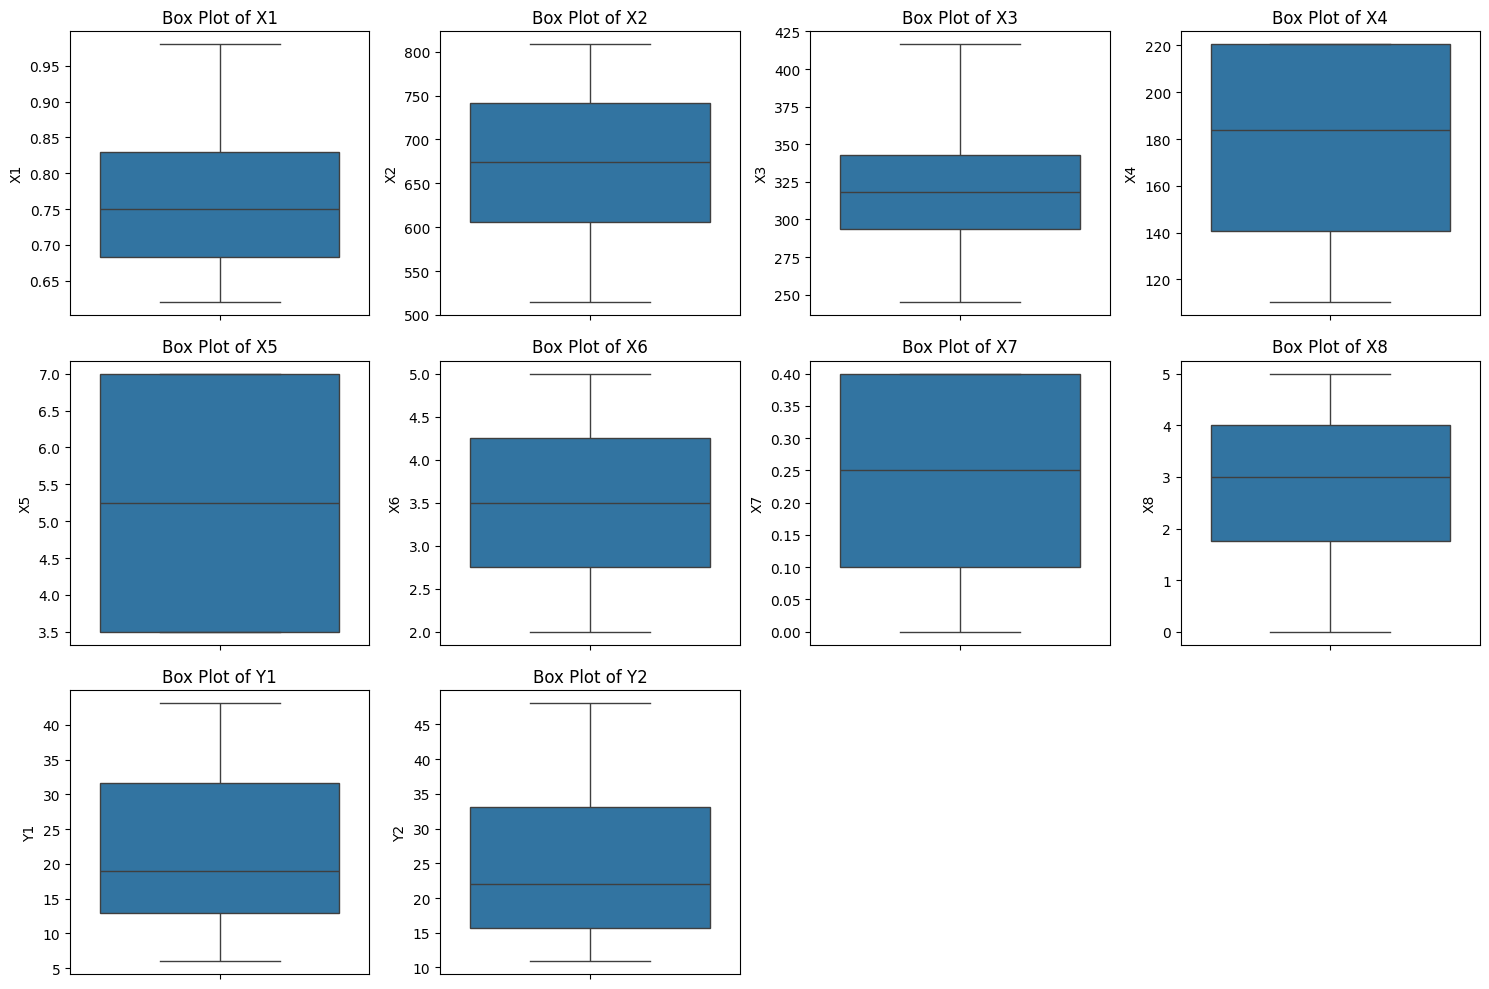

In [44]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


Correlation Matrix:


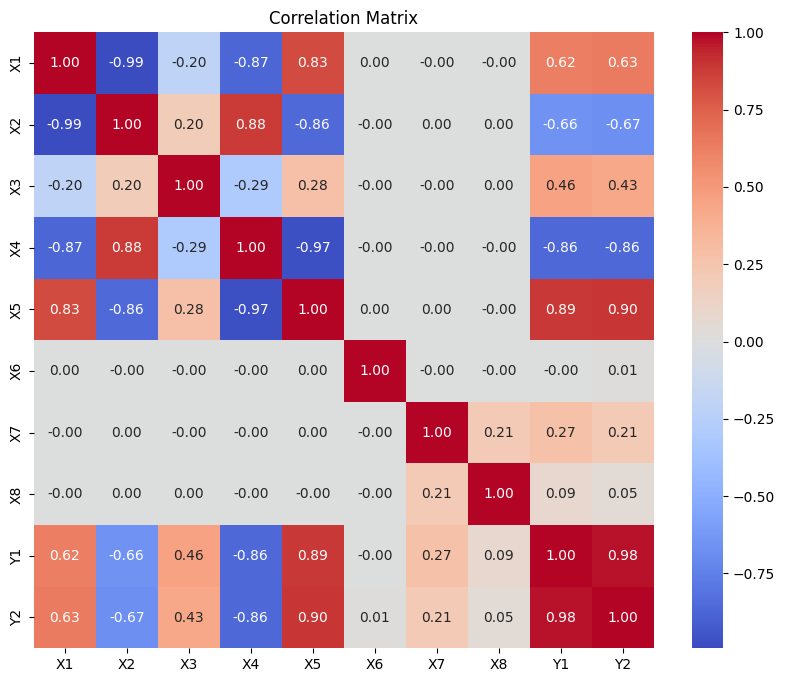

In [45]:
# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

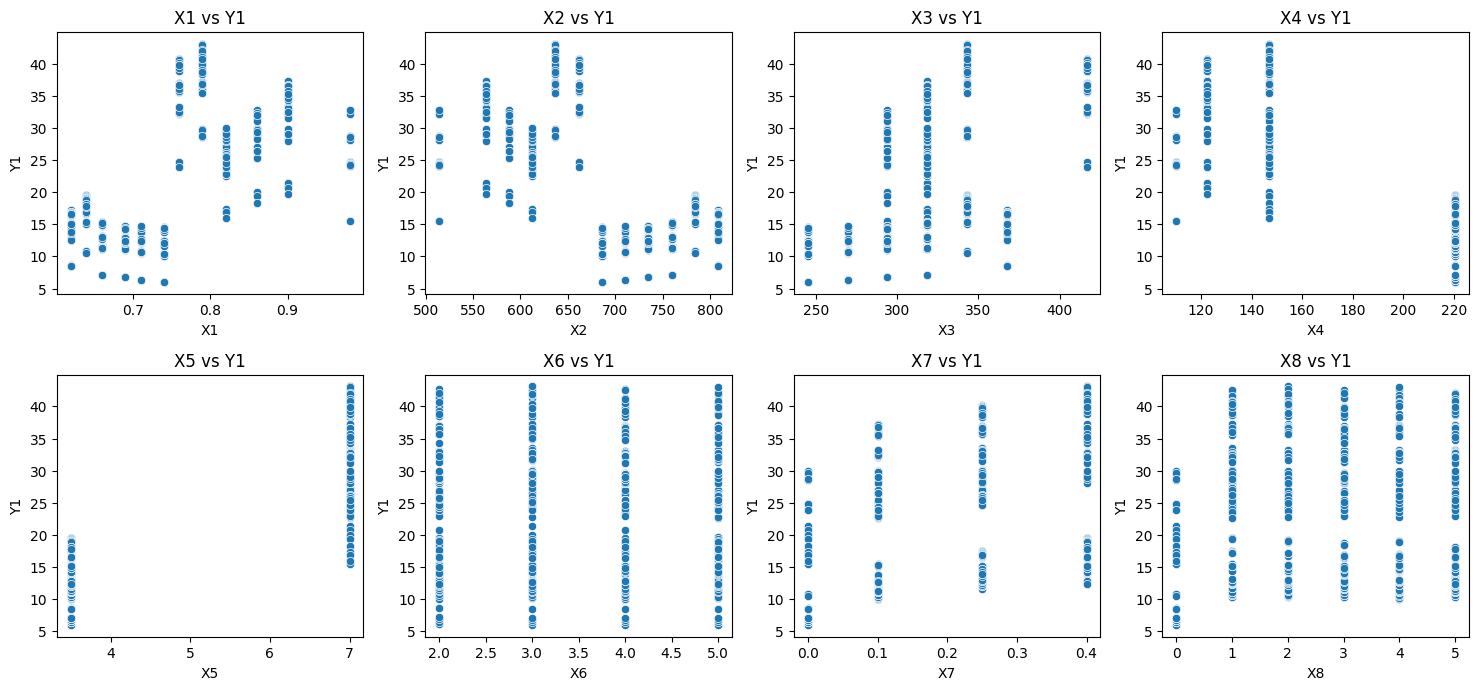

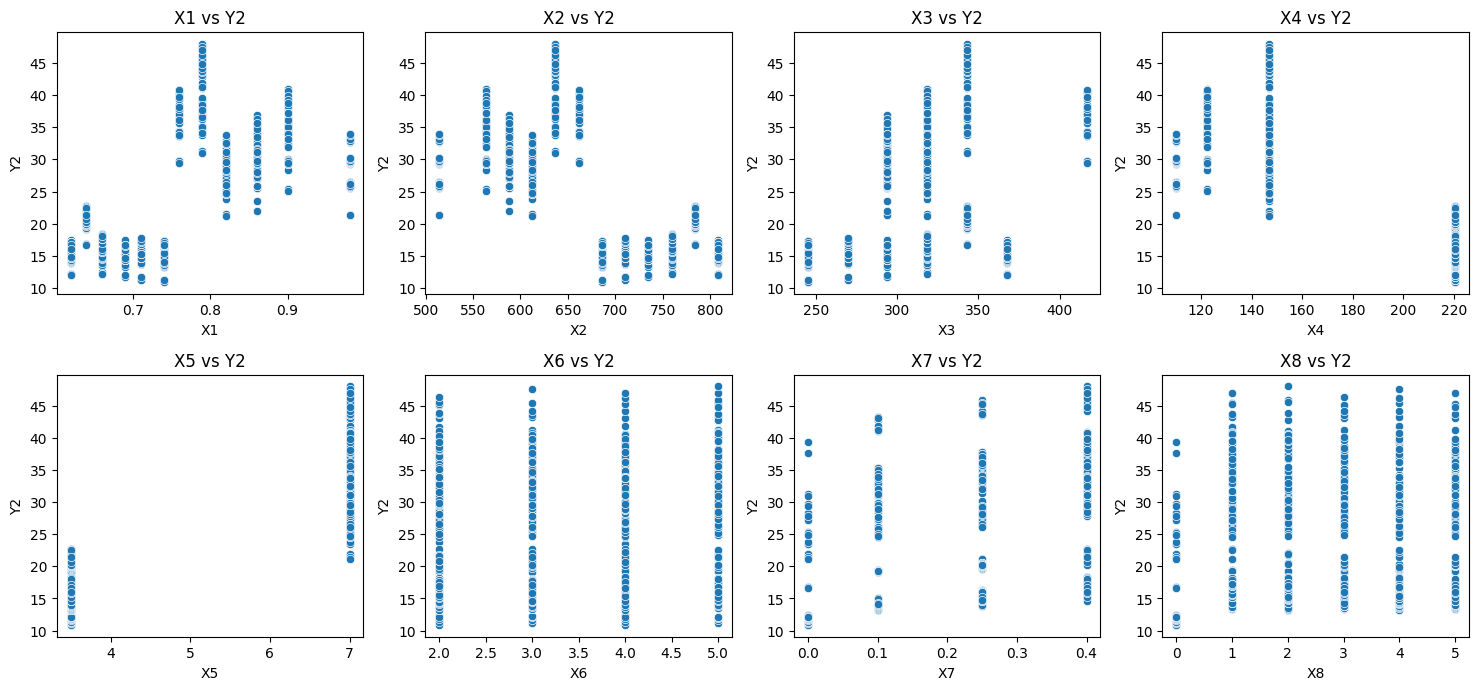

In [46]:
# Scatter plots for relationships between features and target variables
target_variables = ['Y1', 'Y2']  # Y1: Heating Load, Y2: Cooling Load
for target in target_variables:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_features[:-2]):  # Exclude target variables
        plt.subplot(3, 4, i + 1)
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

In [47]:
# Step 3: Preprocessing Steps
# Encode categorical variables (if any)
# In this dataset, all features are numerical, so no encoding is needed.

# Normalize numerical features (optional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features[:-2]])  # Exclude target variables
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features[:-2])

# Combine scaled features with target variables
scaled_df['Y1'] = df['Y1']
scaled_df['Y2'] = df['Y2']

# Split the data into training and testing sets
X = scaled_df.drop(columns=['Y1', 'Y2'])
y = scaled_df['Y1']  # Predicting Heating Load (Y1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Step 4: Linear Regression Model
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 9.153187855202763
R-squared (R²): 0.9121840951546909


In [49]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
  Feature  Coefficient
4      X5     7.216421
6      X7     2.681740
2      X3     0.808902
7      X8     0.327199
5      X6    -0.036268
1      X2    -3.618459
3      X4    -3.919164
0      X1    -6.540545


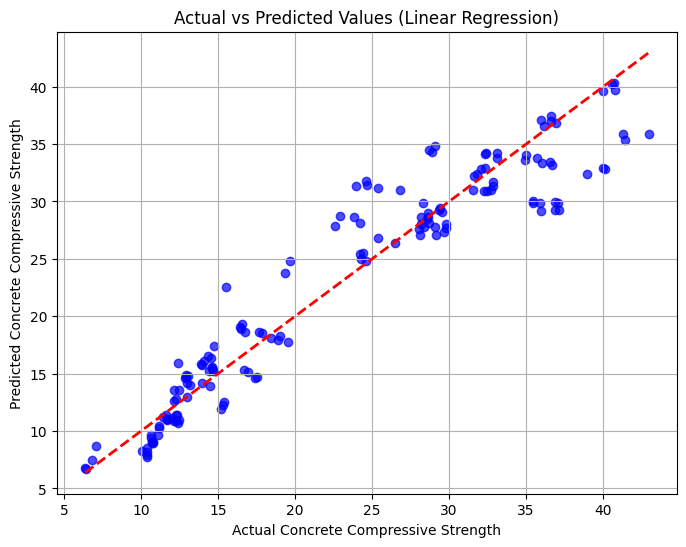

In [50]:
# Step 5: Linear Regression Graph
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Concrete Compressive Strength")
plt.ylabel("Predicted Concrete Compressive Strength")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()

In [51]:
# Step 6: Summary of Insights
print("\nSummary of Insights:")
print("1. Key Observations:")
print("- Features like 'X1' (Relative Compactness) and 'X2' (Surface Area) show strong correlations with the target variable (Heating Load).")
print("- Outliers were detected in some features, which may affect model performance.")
print("- Normalization improved the scale consistency across features.")

print("\n2. Recommendations:")
print("- Consider removing outliers or applying robust scaling techniques.")
print("- Experiment with other regression models (e.g., Ridge, Lasso) for better performance.")
print("- Explore feature engineering to create new meaningful features.")


Summary of Insights:
1. Key Observations:
- Features like 'X1' (Relative Compactness) and 'X2' (Surface Area) show strong correlations with the target variable (Heating Load).
- Outliers were detected in some features, which may affect model performance.
- Normalization improved the scale consistency across features.

2. Recommendations:
- Consider removing outliers or applying robust scaling techniques.
- Experiment with other regression models (e.g., Ridge, Lasso) for better performance.
- Explore feature engineering to create new meaningful features.
